<a href="https://colab.research.google.com/github/Nato9-7/Informe_CsGo/blob/main/Informe_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

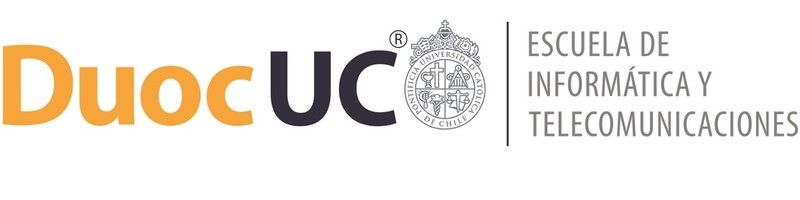

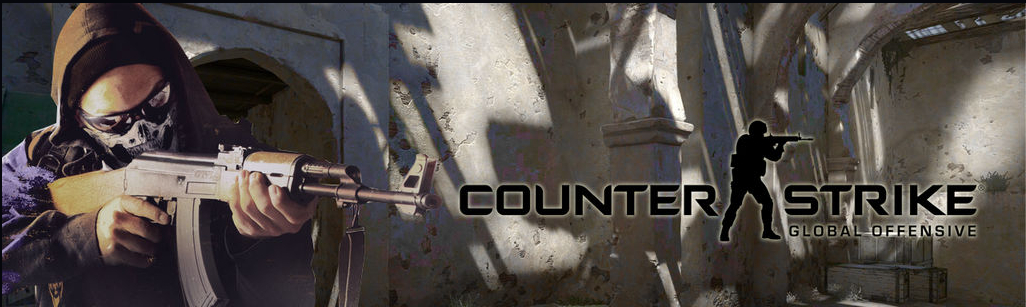

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Hans Mancilla
* Renato Díaz
* Nicolas Hernandez

Docente: GIOCRISRAI GODOY

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

#Contexto del negocio
Counter Strike Global Offensive o mejor conocido como CS:GO es un videojuego desarrollado por Valve Corporation, una compañía estadounidense reconocida por el desarrollo de videojuegos y por la creación de la plataforma de distribución digital Steam. Lanzado en 2012, CS:GO ha crecido hasta convertirse en uno de los títulos más populares en el ámbito de los eSports.

CS:GO es un videojuego de disparos en primera persona enfocado en el juego competitivo. En los torneos profesionales, los equipos luchan por ganar rondas y finalmente obtener la victoria en un partido. Las estadísticas del juego, como el número de bajas (kills), muertes (deaths), asistencias, y otros factores, juegan un papel crucial en evaluar el equilibrio existente dentro del juego.

#Hipotesis del negocio
Clasificación : ¿Podemos predecir si un equipo ganará la partida con base en el valor del equipo inicial y otras estadísticas como el número de granadas lanzadas, headshots, kills, mapa, entre otros?

Regresión : ¿Podemos predecir el número de muertes (kills) en una partida utilizando las estadísticas iniciales de equipo, como el valor de equipamiento y el tipo de armas utilizadas?

## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

#Importaciones

In [ ]:
import pandas as pd # Pandas es una biblioteca de análisis y manipulación de datos.
import re
from enum import Flag # Flag permite definir un conjunto de valores que se pueden combinar mediante operaciones bit a bit.
import numpy as np # Numpy es una biblioteca para el cálculo numérico en Python.
from scipy import stats # Scipy es una biblioteca para la computación científica en Python.
import seaborn as sns # Seaborn está basada en matplotlib y proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos.
import matplotlib.pyplot as plt # Matplotlib es una biblioteca para la creación de gráficos en Python.
from scipy.stats import norm # La distribución normal es una distribución de probabilidad continua que se utiliza ampliamente en estadística.

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
cs_df = pd.read_csv(name, sep=";", encoding='UTF-8', on_bad_lines='warn')

Saving DataframeCS_Malo.csv to DataframeCS_Malo.csv


<ipython-input-2-21f8d7b34bf5>:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  cs_df = pd.read_csv(name, sep=";", encoding='UTF-8', on_bad_lines='warn')


In [ ]:
cs_df.to_csv('DF_CS_ARREGLADO.csv', index=False)
files.download('DF_CS_ARREGLADO.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Exploración de los datos

In [ ]:
#Primeras 10 filas del dataframe
cs_df.head(10)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
5,605,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,850,3750,0,0,0,0
6,606,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,400,3750,0,0,0,0
7,607,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,1,0,0,800,3750,0,0,1,0
8,608,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,3,0,1,1,850,3750,3,1,0,1
9,609,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,2,0,2,0,850,3750,2,0,0,2


In [ ]:
#Cantidad de datos dentro del DF
cs_df.shape

(79157, 30)

Se observa que el dataframe posee 79.157 filas a analizar con 30 columnas por fila

In [ ]:
# informacion general de cada columna
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

Existen 2 columnas de tipo booleano, 4 de tipo float, 17 columnas de tipo int y 7 de tipo object. También se observa que en la columna "MatchWinner" hace falta un dato

In [ ]:
#Codigo para observar datos nulos dentro de las columnas

cs_df.isna().sum()

,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


Se divisa que en las columnas "Team" y "MatchWinner" existen datos nulos, con 2 datos nulos para "Team" y 1 para "MatchWinner"

In [ ]:
# informacion estatistica de las columnas
cs_df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [ ]:
# Clasificación de variables
print("\n--- Clasificación de variables ---")

# Variables numéricas (cuantitativas)
numericas_continuas = ['TimeAlive', 'TravelledDistance',    'PrimaryAssaultRifle',
    'PrimarySniperRifle','PrimaryHeavy','PrimarySMG','PrimaryPistol']

numericas_discretas = ['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
    'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
    'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
    'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']

# Variables categóricas (cualitativas)
categoricas_nominales = [
    'Map',
    'Team',
    'InternalTeamId',
    'MatchId',
]

categoricas_ordinales = ['RoundId']


# Variables binarias
variables_binarias = [
    'RoundWinner',
    'MatchWinner',
    'Survived',
    'AbnormalMatch'
]
print("Variables numéricas continuas:", numericas_continuas)
print("Variables numéricas discretas:", numericas_discretas)
print("Variables categóricas nominales:", categoricas_nominales)
print("Variables categóricas ordinales:", categoricas_ordinales)



--- Clasificación de variables ---
Variables numéricas continuas: ['TimeAlive', 'TravelledDistance', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']
Variables numéricas discretas: ['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']
Variables categóricas nominales: ['Map', 'Team', 'InternalTeamId', 'MatchId']
Variables categóricas ordinales: ['RoundId']


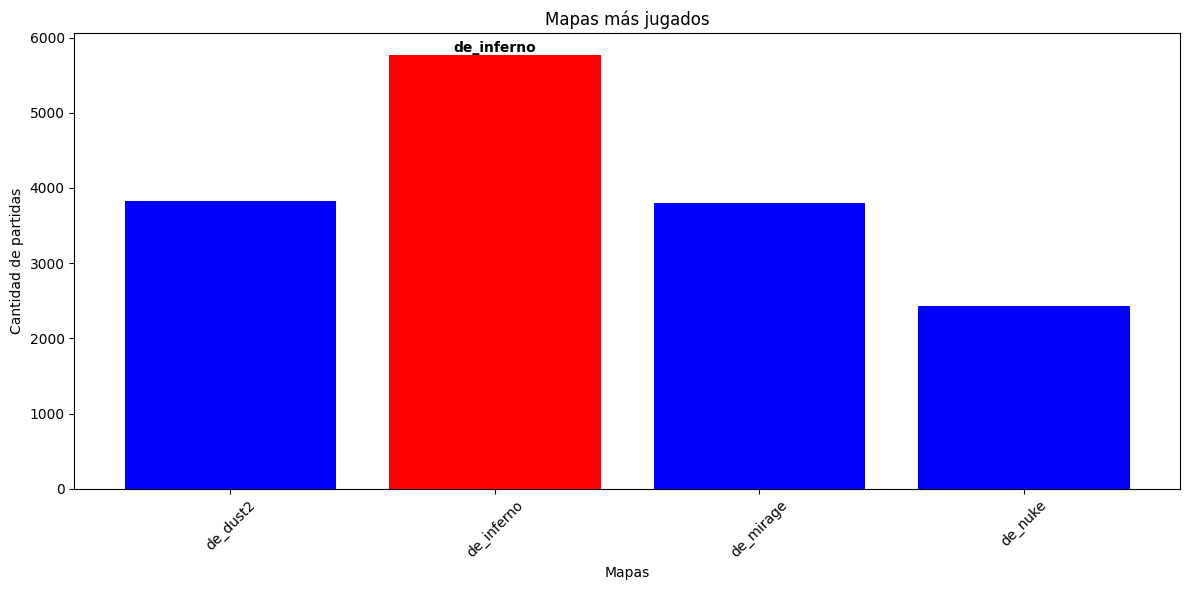

In [ ]:
# Calcular la frecuencia de victorias por mapa
mapa_con_victorias = cs_df[cs_df['MatchWinner'].notnull()].groupby('Map')['MatchWinner'].count()/5

mapa_mas_victorias = mapa_con_victorias.idxmax()

plt.figure(figsize=(12, 6))
bar_colors = ['blue' if mapa != mapa_mas_victorias else 'red' for mapa in mapa_con_victorias.index]
plt.bar(mapa_con_victorias.index, mapa_con_victorias.values, color=bar_colors)
plt.xlabel('Mapas')
plt.ylabel('Cantidad de partidas')
plt.title('Mapas más jugados')
plt.xticks(rotation=45)
plt.tight_layout()

plt.text(mapa_con_victorias.index.get_loc(mapa_mas_victorias), mapa_con_victorias.max(), f'{mapa_mas_victorias}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.show()

Este gráfico muestra que Mirage, Inferno y Dust2 son los mapas más jugados, con Inferno liderando ampliamente.

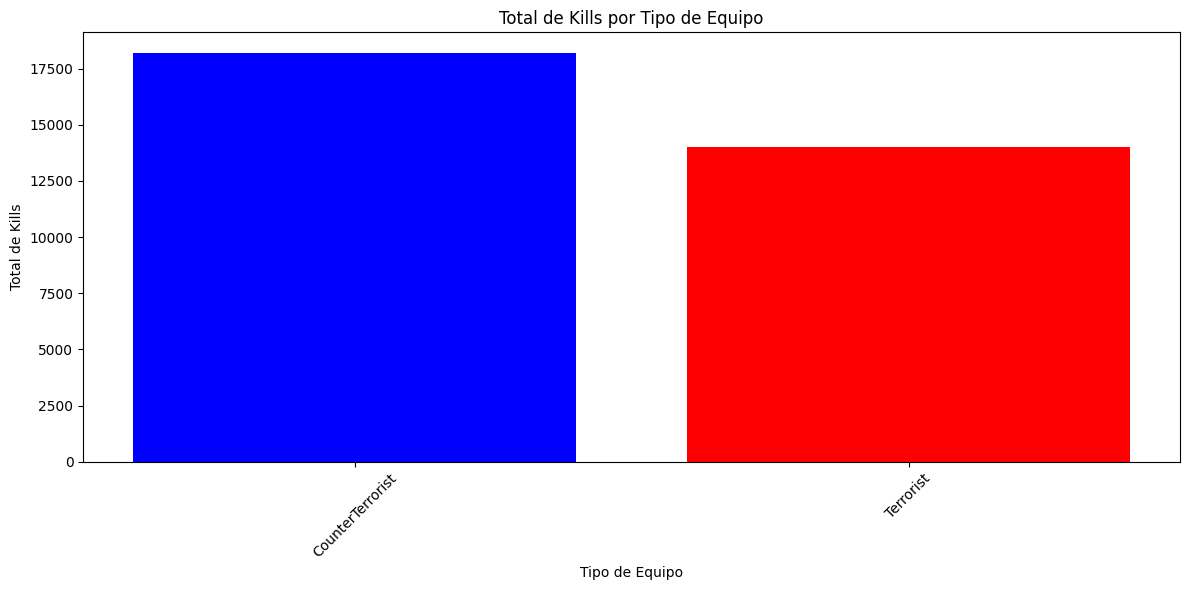

In [ ]:
# Calcular el total de kills por equipo y tipo de equipo
total_kills_por_equipo = cs_df.groupby(['InternalTeamId', 'Team'])['RoundKills'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(total_kills_por_equipo['Team'], total_kills_por_equipo['RoundKills'], color=['blue','red' ])
plt.xlabel('Tipo de Equipo')
plt.ylabel('Total de Kills')
plt.title('Total de Kills por Tipo de Equipo')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Se compara el número total de eliminaciones (kills) realizadas por el equipo Terrorista (T) y el equipo Antiterrorista (CT).

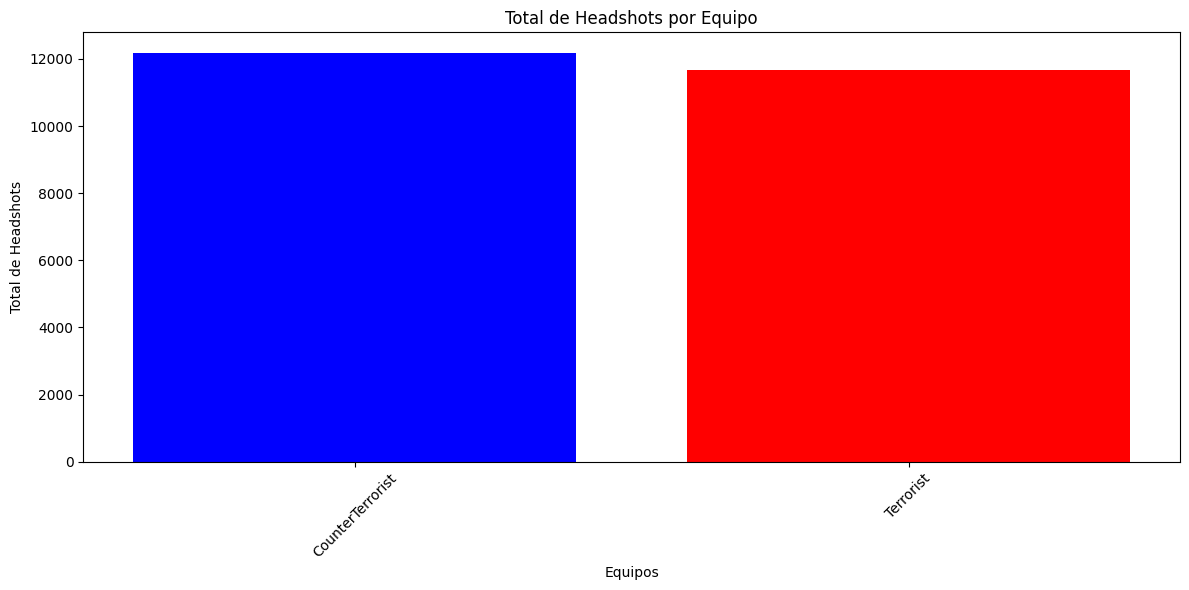

In [ ]:
# Calcular el total de headshots por equipo
total_headshots_por_equipo = cs_df.groupby('Team')['RoundHeadshots'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(total_headshots_por_equipo['Team'], total_headshots_por_equipo['RoundHeadshots'], color=['blue','red' ])
plt.xlabel('Equipos')
plt.ylabel('Total de Headshots')
plt.title('Total de Headshots por Equipo')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Compara la cantidad total de headshots logrados por los CT y los T.

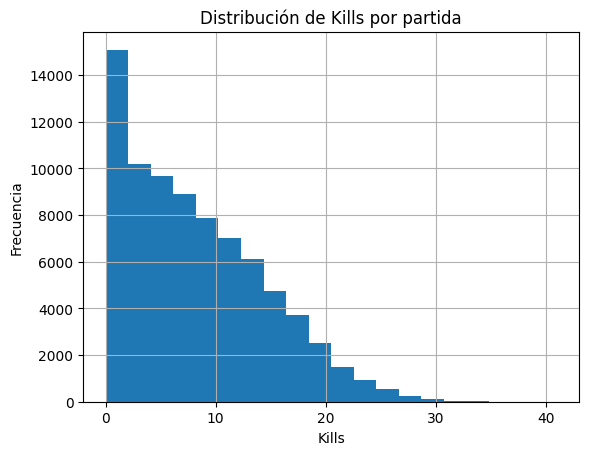

In [ ]:
# Ejemplo de análisis básico: distribución de las kills por equipo
cs_df['MatchKills'].hist(bins=20)
plt.title('Distribución de Kills por partida')
plt.xlabel('Kills')
plt.ylabel('Frecuencia')
plt.show()

Se observa cómo se distribuyen las kills en todas las partidas, agrupadas por rangos de kills

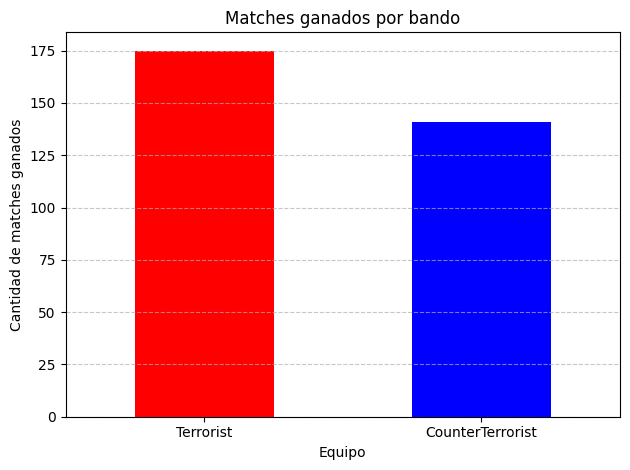

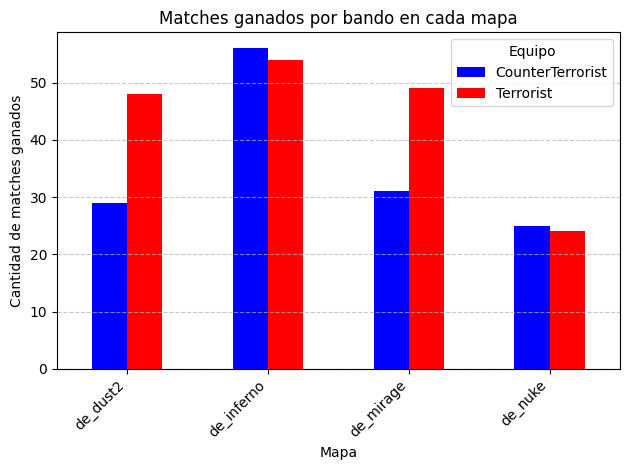

In [ ]:
# Filtrar jugadores cuyo equipo ganó la partida
ganadores_match = cs_df[cs_df['MatchWinner'] == 1]

# Tomar una sola fila por partida ganada
ganadores_unicos = ganadores_match.drop_duplicates(subset=['MatchId'])


# Contar cuántas veces ganó cada bando
conteo_match = ganadores_unicos['Team'].value_counts()

# Contar cuántos matches ganó cada bando por mapa
conteo_por_mapa = ganadores_unicos.groupby(['Map', 'Team']).size().unstack(fill_value=0)


def bandoMasGanador():

  # Graficar
  conteo_match.plot(kind='bar', color=['red', 'blue'])
  plt.title('Matches ganados por bando')
  plt.xlabel('Equipo')
  plt.ylabel('Cantidad de matches ganados')
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

def equipoGanadorPorMapa():

  conteo_por_mapa.plot(kind='bar', stacked=False, color=['blue','red' ])
  plt.title('Matches ganados por bando en cada mapa')
  plt.xlabel('Mapa')
  plt.ylabel('Cantidad de matches ganados')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Equipo')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

bandoMasGanador()
equipoGanadorPorMapa()

Primer Grafico: Compara cuántas partidas fueron ganadas por los CTs y cuántas por los Ts.

Segundo Grafico: Se desglosa la cantidad de partidas ganadas por CTs y Ts en cada mapa.



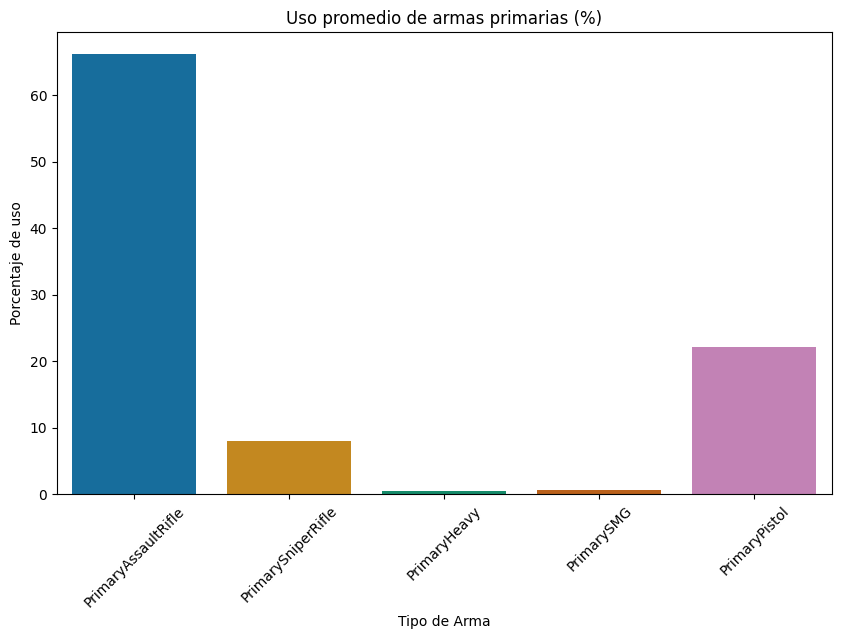

In [ ]:
# Lista de columnas de armas primarias
primary_weapons = ['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']


# 1. Calcular el promedio de uso de cada arma (en porcentaje)
weapon_usage = cs_df[primary_weapons].mean() * 100

# 2. Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_usage.index, y=weapon_usage.values, hue=weapon_usage.index, palette='colorblind', legend=False)
plt.title('Uso promedio de armas primarias (%)')
plt.xlabel('Tipo de Arma')
plt.ylabel('Porcentaje de uso')
plt.xticks(rotation=45)
plt.show()

Muestra qué porcentaje del tiempo se usó cada tipo de arma primaria

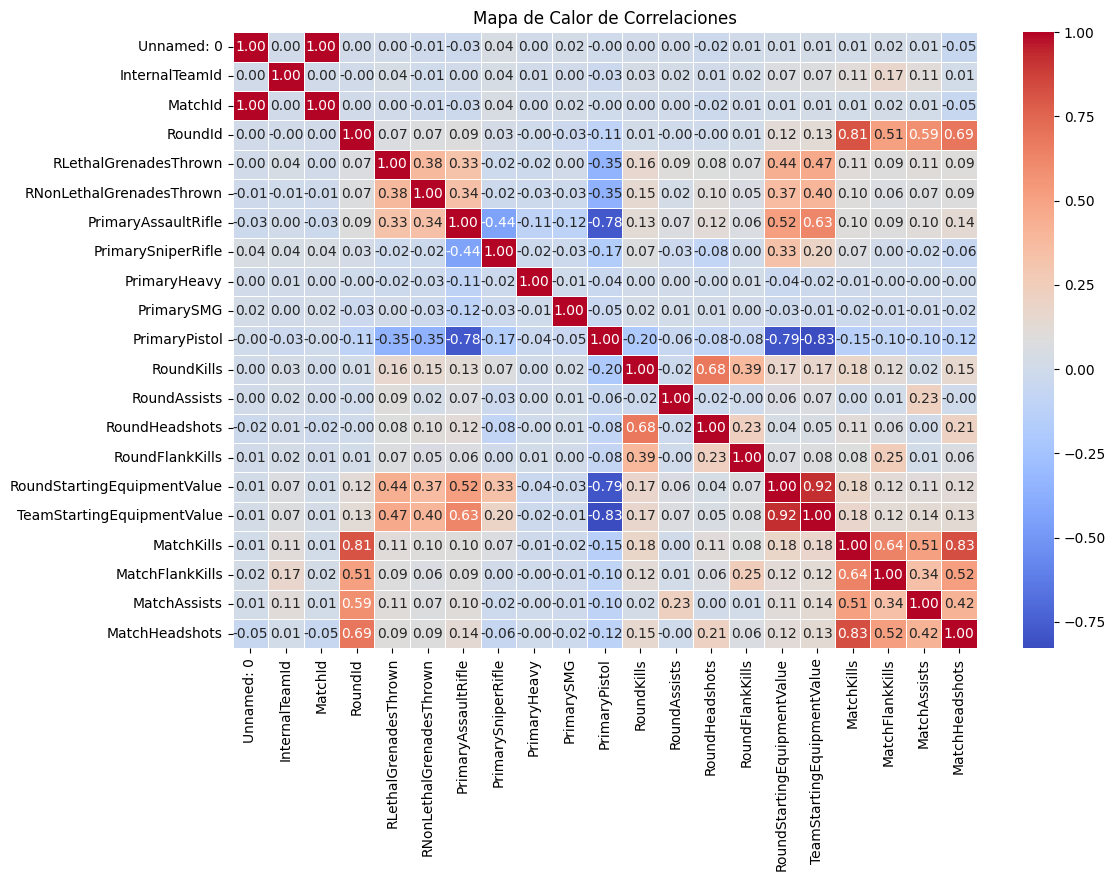

In [ ]:

# Calcular la matriz de correlación
numeric_df = cs_df.select_dtypes(include=['number']).dropna()
correlation_matrix = numeric_df.corr()

# Crear el gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

Se observan fuertes correlaciones positivas entre kills y rondas ganadas, y negativas entre muertes y rondas ganadas. Esto significa que cuantos más kills consigue un equipo, más probablemente ganará la partida; y a la inversa, a más muertes sufridas, menos victorias.

#Promedio de Granadas Letales y No Letales Lanzadas por Victoria en Ronda


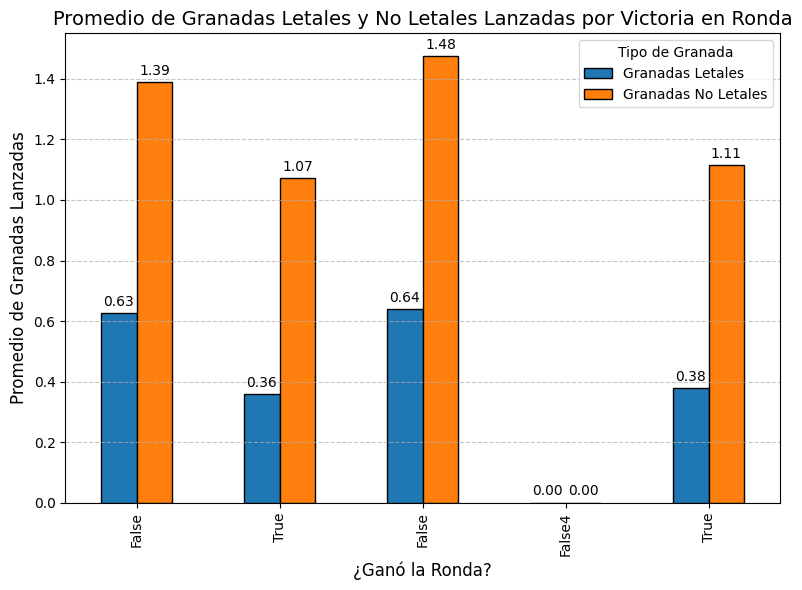

In [ ]:
# Agrupar por victoria de ronda y calcular el promedio de granadas lanzadas
avg_grenades = cs_df.groupby('RoundWinner')[['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown']].mean()

# Crear gráfico de barras mejorado
ax = avg_grenades.plot(
    kind='bar',
    figsize=(8, 6),
    color=['#1f77b4', '#ff7f0e'],
    edgecolor='black'
)

plt.title("Promedio de Granadas Letales y No Letales Lanzadas por Victoria en Ronda", fontsize=14)
plt.xlabel("¿Ganó la Ronda?", fontsize=12)
plt.ylabel("Promedio de Granadas Lanzadas", fontsize=12)
plt.legend(["Granadas Letales", "Granadas No Letales"], title="Tipo de Granada")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas numéricas en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


Muestra el promedio de granadas usadas en las rondas ganadas.

<ipython-input-22-a7040eacb803>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RoundWinner', y='RoundKills', data=cs_df, estimator=np.mean, ci=None) # Cambiar estimator a np.mean


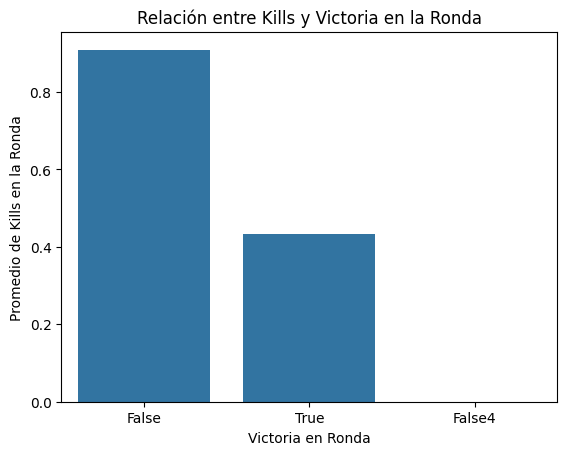

In [ ]:
# Crear gráfico de barras que muestre el promedio de kills por victoria en la ronda
sns.barplot(x='RoundWinner', y='RoundKills', data=cs_df, estimator=np.mean, errorbar=None)
plt.title("Relación entre Kills y Victoria en la Ronda")
plt.xlabel("Victoria en Ronda")
plt.ylabel("Promedio de Kills en la Ronda")
plt.show()

Grafica cómo el número de kills se relaciona con la probabilidad de ganar una ronda.



Probabilidad de ganar una ronda de pistolas por bando:
RoundWinner
Terrorist           50.79 %
CounterTerrorist    49.21 %
Name: proportion, dtype: object
Probabilidad de ganar una ronda de pistolas por bando y mapa (en %):
RoundWinner CounterTerrorist Terrorist
Map                                   
de_dust2             45.83 %   54.17 %
de_inferno           52.05 %   47.95 %
de_mirage            46.43 %   53.57 %
de_nuke              57.14 %   42.86 %


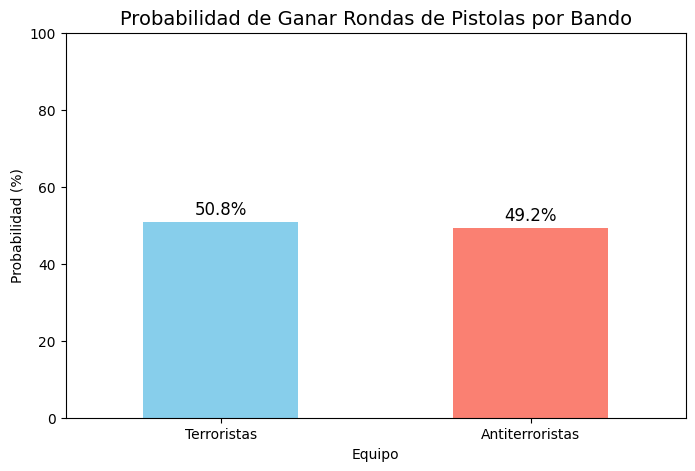

In [ ]:
# Paso 1: Filtrar jugadores que usaron pistolas
pistolas = cs_df[cs_df['PrimaryPistol'] == 1]

# Paso 2: Ver cuántos jugadores por ronda y equipo usaron pistolas
conteo_pistolas = pistolas.groupby(['MatchId', 'RoundId', 'Team']).size().reset_index(name='Pistoleros')

# Paso 3: Rondas donde ambos equipos tienen 5 pistoleros (es decir, ronda de pistolas real)
pivot = conteo_pistolas.pivot_table(index=['MatchId', 'RoundId'], columns='Team', values='Pistoleros')
rondas_pistolas = pivot[(pivot['Terrorist'] == 5) & (pivot['CounterTerrorist'] == 5)].reset_index()


# Filtrar solo filas donde RoundWinner == True (ese jugador ganó)
rondas_ganadas = cs_df[cs_df['RoundWinner'] == 'True']

# Traer una fila por ronda ganada (cualquiera del equipo ganador)
ganadores = rondas_ganadas.drop_duplicates(subset=['MatchId', 'RoundId'])[['MatchId', 'RoundId', 'Team', 'Map']]

# Unir con las rondas de pistolas
rondas_pistolas = rondas_pistolas.merge(ganadores, on=['MatchId', 'RoundId'], how='left')
rondas_pistolas.rename(columns={'Team': 'RoundWinner'}, inplace=True)

#Calcular la probabilidad
probabilidades = rondas_pistolas['RoundWinner'].value_counts(normalize=True)

# Paso 5: Calcular la probabilidad por mapa y bando
probabilidades_mapa = rondas_pistolas.groupby(['Map', 'RoundWinner']).size().unstack(fill_value=0)

# Convertir a porcentaje (por fila/mapa)
probabilidades_mapa_pct = (probabilidades_mapa.T / probabilidades_mapa.sum(axis=1)).T * 100


# Mostrar como porcentaje
print("Probabilidad de ganar una ronda de pistolas por bando:")
print((probabilidades * 100).round(2).astype(str) + " %")

print("Probabilidad de ganar una ronda de pistolas por bando y mapa (en %):")
print(probabilidades_mapa_pct.round(2).astype(str) + " %")



# Gráfico de probabilidad global por bando
plt.figure(figsize=(8, 5))
(probabilidades * 100).plot(kind='bar', color=['salmon','skyblue'])
plt.title('Probabilidad de Ganar Rondas de Pistolas por Bando', fontsize=14)
plt.xlabel('Equipo')
plt.ylabel('Probabilidad (%)')
plt.xticks([0, 1], ['Terroristas', 'Antiterroristas'], rotation=0)
plt.ylim(0, 100)

# Añadir etiquetas con los valores
for i, prob in enumerate(probabilidades):
    plt.text(i, prob * 100 + 2, f"{prob * 100:.1f}%", ha='center', fontsize=12)

plt.show()


Se mide qué bando (CT o T) gana más frecuentemente las rondas de pistolas (primera ronda de cada mitad).



<Figure size 1200x800 with 0 Axes>

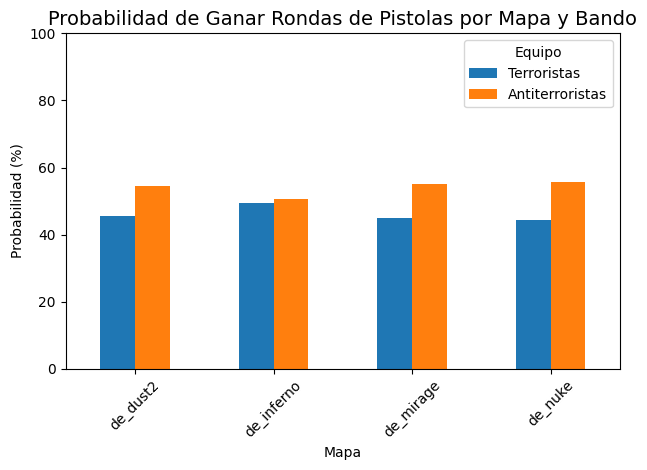

In [ ]:
# Gráfico de probabilidad por mapa
plt.figure(figsize=(12, 8))
probabilidades_mapa_pct.plot(kind='bar', stacked=False, width=0.5)
plt.title('Probabilidad de Ganar Rondas de Pistolas por Mapa y Bando', fontsize=14)
plt.xlabel('Mapa')
plt.ylabel('Probabilidad (%)')
plt.xticks(rotation=45)
plt.legend(title='Equipo', labels=['Terroristas', 'Antiterroristas'])
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

Se analiza en cada mapa qué bando tiene más probabilidades de ganar la ronda de pistolas.



In [ ]:
#Variables numericas que nos interesan para analisis
var_numericas = ['RoundFlankKills', 'RoundKills', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue']

# Estadísticas descriptivas completas para variables numéricas
print("\n--- Estadísticas descriptivas para variables numéricas ---")
stats_df = cs_df[var_numericas].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
stats_df = stats_df.T  # Transponer para mejor visualización
stats_df['cv'] = stats_df['std'] / stats_df['mean']  # Coeficiente de variación
stats_df['skew'] = cs_df[var_numericas].skew()  # Asimetría
stats_df['kurt'] = cs_df[var_numericas].kurtosis()  # Curtosis
stats_df = stats_df.round(2)  # Redondear para mejor legibilidad
print(stats_df)

# Función para calcular la moda
def get_mode(x):
    mode_result = stats.mode(x)
    # Handle cases where mode_result.mode is a scalar
    if hasattr(mode_result, 'mode'):  # For scipy < 1.9.0
        return mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
    else:  # For scipy >= 1.9.0
        return mode_result.mode

# Añadir moda a las estadísticas
print("\n--- Moda para variables numéricas ---")
modes = {col: get_mode(cs_df[col].dropna()) for col in var_numericas}
for col, mode_val in modes.items():
    print(f"{col}: {mode_val}")

print("\n--- Análisis de distribución y sesgo ---")
for col in ['RoundFlankKills', 'RoundKills', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue']:
    skew = cs_df[col].skew()
    kurt = cs_df[col].kurtosis()
    print(f"{col}:")
    print(f"  Asimetría (Skewness): {skew:.2f} - ", end="")
    if skew > 0.5:
        print("Sesgo positivo significativo (cola a la derecha)")
    elif skew < -0.5:
        print("Sesgo negativo significativo (cola a la izquierda)")
    else:
        print("Distribución aproximadamente simétrica")

    print(f"  Curtosis: {kurt:.2f} - ", end="")
    if kurt > 0.5:
        print("Leptocúrtica (más apuntada que la normal)")
    elif kurt < -0.5:
        print("Platicúrtica (más aplanada que la normal)")
    else:
        print("Mesocúrtica (similar a la normal)")
    print()


--- Estadísticas descriptivas para variables numéricas ---
                               count      mean      std  min      1%      5%  \
RoundFlankKills              79157.0      0.10     0.32  0.0     0.0     0.0   
RoundKills                   79157.0      0.67     0.88  0.0     0.0     0.0   
RLethalGrenadesThrown        79157.0      0.50     0.60  0.0     0.0     0.0   
RNonLethalGrenadesThrown     79157.0      1.26     1.18  0.0     0.0     0.0   
RoundStartingEquipmentValue  79157.0   3778.11  2111.29  0.0   200.0   200.0   
TeamStartingEquipmentValue   79157.0  18890.13  9743.20  0.0  1000.0  1300.0   

                                 25%      50%      75%      95%      99%  \
RoundFlankKills                  0.0      0.0      0.0      1.0      1.0   
RoundKills                       0.0      0.0      1.0      2.0      3.0   
RLethalGrenadesThrown            0.0      0.0      1.0      2.0      2.0   
RNonLethalGrenadesThrown         0.0      1.0      2.0      3.0      4.0   

## Fase 3: Data Preparation

In [ ]:
#Nombre para la columna sin nombre
cs_df = cs_df.rename(columns={"Unnamed: 0": "ID"})

**Datos nulos en la columna TEAM**

In [ ]:
filas_con_nulos = cs_df[['ID', 'Team']][cs_df['Team'].isnull()]

print(filas_con_nulos)

     ID Team
13  613  NaN
27  627  NaN


In [ ]:
filas_nulas = cs_df[cs_df['Team'].isnull()].index

for fila in filas_nulas:
    display(cs_df.iloc[fila-5:fila+6])

,ID,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
8,608,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,3,0,1,1,850,3750,3,1,0,1
9,609,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,2,0,2,0,850,3750,2,0,0,2
10,610,de_inferno,Terrorist,1,4,2,True,True,True,False,...,0,0,0,0,300,1300,0,0,0,0
11,611,de_inferno,Terrorist,1,4,2,True,True,False,False,...,0,0,0,0,200,1300,0,0,0,0
12,612,de_inferno,Terrorist,1,4,2,True,True,False,False,...,0,0,0,0,300,1300,0,0,0,0
13,613,de_inferno,NaN,1,4,2,True,True,False,False,...,0,0,0,0,300,1300,0,0,0,0
14,614,de_inferno,Terrorist,1,4,2,True,True,False,False,...,0,0,0,0,200,1300,0,0,0,0
15,615,de_inferno,CounterTerrorist,2,4,2,False,False,True,False,...,3,0,2,0,4300,19950,3,0,0,2
16,616,de_inferno,CounterTerrorist,2,4,2,False,False,True,False,...,0,1,0,0,3850,19950,0,0,1,0
17,617,de_inferno,CounterTerrorist,2,4,2,False,False,True,False,...,1,0,1,0,3550,19950,1,0,1,1


,ID,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
22,622,de_inferno,Terrorist,1,4,3,True,True,True,False,...,0,0,0,0,300,2000,0,0,0,0
23,623,de_inferno,Terrorist,1,4,3,True,True,False,False,...,0,0,0,0,300,2000,0,0,0,0
24,624,de_inferno,Terrorist,1,4,3,True,True,False,False,...,0,0,0,0,400,2000,0,0,0,0
25,625,de_inferno,CounterTerrorist,2,4,3,False,False,True,False,...,1,2,1,0,5100,22850,4,0,2,3
26,626,de_inferno,CounterTerrorist,2,4,3,False,False,True,False,...,3,1,1,0,4750,22850,3,0,2,1
27,627,de_inferno,NaN,2,4,3,False,False,True,False,...,1,0,0,0,3250,22850,2,0,1,1
28,628,de_inferno,CounterTerrorist,2,4,3,False,False,True,False,...,0,0,0,0,5500,22850,4,1,0,1
29,629,de_inferno,CounterTerrorist,2,4,3,False4,NaN,True,False,...,0,0,0,0,4250,22850,2,0,1,2
30,630,de_inferno,Terrorist,1,4,4,True,True,False,False,...,0,0,0,0,4350,23350,0,0,0,0
31,631,de_inferno,Terrorist,1,4,4,True,True,False,False,...,0,0,0,0,4700,23350,0,0,0,0


Al ejecutar este código, observamos que en algunos casos no sabemos a qué equipo pertenece una entrada porque el campo Team aparece como null. Lo útil de este proceso es que permite revisar los datos anteriores y posteriores a esos nulos, encontrando que los jugadores cercanos sí tienen un equipo asignado (CounterTerrorist o Terrorist). Además, al desglosar los datos, se detectan errores de escritura, como en el RoundWinner del ID 629, donde aparece False4 en lugar de un valor válido.

**Filas con datos nulos en MATCHWINNER**

In [ ]:
filas_con_nulos = cs_df[['ID', 'MatchWinner']][cs_df['MatchWinner'].isnull()]

print(filas_con_nulos)

     ID MatchWinner
29  629         NaN


In [ ]:
fila_nula = cs_df[cs_df['MatchWinner'].isnull()].index[0]
cs_df.iloc[fila_nula-5:fila_nula+5]

,ID,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
24,624,de_inferno,Terrorist,1,4,3,True,True,False,False,...,0,0,0,0,400,2000,0,0,0,0
25,625,de_inferno,CounterTerrorist,2,4,3,False,False,True,False,...,1,2,1,0,5100,22850,4,0,2,3
26,626,de_inferno,CounterTerrorist,2,4,3,False,False,True,False,...,3,1,1,0,4750,22850,3,0,2,1
27,627,de_inferno,NaN,2,4,3,False,False,True,False,...,1,0,0,0,3250,22850,2,0,1,1
28,628,de_inferno,CounterTerrorist,2,4,3,False,False,True,False,...,0,0,0,0,5500,22850,4,1,0,1
29,629,de_inferno,CounterTerrorist,2,4,3,False4,NaN,True,False,...,0,0,0,0,4250,22850,2,0,1,2
30,630,de_inferno,Terrorist,1,4,4,True,True,False,False,...,0,0,0,0,4350,23350,0,0,0,0
31,631,de_inferno,Terrorist,1,4,4,True,True,False,False,...,0,0,0,0,4700,23350,0,0,0,0
32,632,de_inferno,Terrorist,1,4,4,True,True,False,False,...,0,0,0,0,4700,23350,0,0,0,0
33,633,de_inferno,Terrorist,1,4,4,True,True,False,False,...,0,0,0,0,4800,23350,0,0,0,0


In [ ]:
# Configura pandas para mostrar todos los dígitos de los números grandes
pd.set_option('display.float_format', lambda x: f'{x:.0f}')

fila = cs_df[['TimeAlive', 'TravelledDistance', 'FirstKillTime']]
display(fila)

,TimeAlive,TravelledDistance,FirstKillTime
0,51.120.248.995.704.500,10.083.140.737.457.000,0.0
1,4.348.662.552.266.170,60.960.883.184.688.400,0.0
2,3.735.469.847.054.540,5.642.252.383.582.750,0.0
3,4.767.886.136.441.470,8.963.473.313.229.970,0.0
4,5.312.251.089.027.310,10.865.649.734.393.100,0.0
...,...,...,...
79152,340.272.074.099.723,4.048.177.852.924.460,2.277.596
79153,2.926.105.436.288.080,3.213.477.612.567.870,28.714.119
79154,5.914.717.797.783.930,6.005.168.938.274.500,297.689.228
79155,42.582.842.797.783.900,27.987.628.542.398.100,7.528.178


In [ ]:
#Cambia a float la columna PrimaryPistol
cs_df['PrimaryPistol'] = pd.to_numeric(cs_df['PrimaryPistol'], errors='coerce').astype(float)

def cambiosTeam():
  if cs_df['Team'].isnull().any():
    filas_nulas = cs_df[cs_df['Team'].isnull()].index
    cs_df.at[filas_nulas[0], 'Team'] = 'Terrorist'
    cs_df.at[filas_nulas[1], 'Team'] = 'CounterTerrorist'
    print(f"Valores nulos en 'Team'  corregidos.")
  else:
      print("No se encontraron filas con valores nulos en 'Team'")

#0 ES FALSE Y 1 ES TRUE
def cambiarDatosMatchWinner_RoundWinner():
  # Crea una máscara booleana para las filas con valores problemáticos en la columna 6
  mask_col6 = ~cs_df.iloc[:, 6].astype(str).str.fullmatch(r'false|False|true|True', flags=re.IGNORECASE)
  # Crea una máscara booleana para las filas con valores problemáticos en la columna 7
  mask_col7 = ~cs_df.iloc[:, 7].astype(str).str.fullmatch(r'false|False|true|True', flags=re.IGNORECASE)
  # Combina las máscaras para obtener las filas con problemas en cualquiera de las dos columnas
  problematic_rows = cs_df[mask_col6 | mask_col7]
  cs_df.iloc[:, [6, 7]] = cs_df.iloc[:, [6, 7]].astype(str).replace({'false': 0, 'False': 0, 'False4': 0, 'true': 1, 'True': 1})

  #Cambiar
  cs_df["MatchWinner"] = cs_df["MatchWinner"].replace('nan', 0)



def cambioDatosArmas():
  primary_colums = ['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG']

  for column in primary_colums: # Verificar si la columna es una columna "Primary"
      cs_df[column] = cs_df[column].apply(lambda x: 0.0 if x < 0.09 else 1.0)


def convertirNumerosGrandes():
  columns_of_interest = ['TimeAlive', 'FirstKillTime','TravelledDistance']
  for col in columns_of_interest:
      cs_df[col] = cs_df[col].astype(str)
      cs_df[col] = cs_df[col].str.replace('.', '', regex=False)
      cs_df[col] = cs_df[col].str.replace(',', '', regex=False)
      cs_df[col] = cs_df[col].astype(float)

  scaling_factor = 1e15
  for col in columns_of_interest:
      cs_df[col] = cs_df[col] / scaling_factor

cambiarDatosMatchWinner_RoundWinner()
cambioDatosArmas()
convertirNumerosGrandes()
cambiosTeam()

Al ejecutar este código, observamos que se corrigen errores en los datos, como valores mal escritos en MatchWinner y RoundWinner, donde aparece, por ejemplo, False4 en lugar de false, y se normalizan a 0 o 1. También se limpia PrimaryPistol para que todos sus valores sean flotantes, y se corrige TimeAlive, eliminando puntos que provocaban errores al convertirla a número. Además, se ajustan datos de armas, normalizando valores menores a 0.09 a cero, y se escalan columnas con números muy grandes como TimeAlive y TravelledDistance, dejándolos en una magnitud adecuada para análisis.